# Exploratory Data Analysis with Python
[Takato Matsumoto](takato.matsumoto0114@gmail.com) - May 2020




## 不動産データの分析 
不動産の価格にどのような要素が影響を与えるのかを分析することを目的としたものです．  
以下の分析を行います．
1. <b>物件価格の分析</b>
2. <b>物件の価格と広さの分析</b>
3. <b>物件の価格とグレードの分析</b>
4. <b>物件の価格と建築年の分析</b>
5. <b>物件の価格と立地の分析</b>

In [0]:
#ライブラリの読み込み
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os.path
import warnings
warnings.filterwarnings('ignore')

In [0]:
#グラフの設定
plt.style.use('ggplot')
#plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (15,10)

In [0]:
#CSVファイルの読み込み，dfという名前のデータフレームにCSVファイルを読み込んでいます
url = 'https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_1/dataset/train.csv'
df = pd.read_csv(url, low_memory=False)

In [25]:
#読み込んだデータのチェック、テーブル上から10行を表示しています
df.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,4239400730,152000,3,1.00,1090,3264,1.0,0,0,4,6,1090,0,1969,0,98092,47.3155,-122.182,1090,3330
1,5016001060,650000,2,2.50,1740,2500,2.0,0,2,3,8,1210,530,1994,0,98112,47.6220,-122.300,1640,2500
2,7212650200,350000,3,2.50,2180,15484,1.0,0,0,3,8,2180,0,1992,0,98003,47.2688,-122.309,2090,10775
3,3876312570,350500,3,2.25,1870,7200,1.0,0,0,3,7,1390,480,1975,0,98072,47.7340,-122.174,1830,7876
4,8562901010,505000,2,3.00,2770,10800,1.5,0,0,5,8,1910,860,1984,0,98074,47.6082,-122.057,2140,10800
5,1180005220,225000,2,1.00,1070,6000,1.0,0,0,4,5,1070,0,1922,0,98178,47.4950,-122.227,1910,6000
6,2011400782,229500,1,1.00,1180,22000,1.0,0,2,3,6,1180,0,1948,0,98198,47.4007,-122.323,1890,11761
7,2256500005,612000,3,3.00,1740,3700,1.0,0,0,3,7,1740,0,1982,0,98122,47.6102,-122.309,1830,2480
8,1785400770,500000,4,2.25,1960,12436,2.0,0,0,3,8,1960,0,1984,0,98074,47.6276,-122.037,1960,12436
9,7237450190,430760,5,2.75,2710,4685,2.0,0,0,3,8,2710,0,2014,0,98038,47.3555,-122.062,2710,4449


一番上のidが4239400730の物件は

*   price: 価格が152000ドル
*   bedrooms: 寝室が3つ
*   bathrooms: 風呂が1つ

であることがわかります。

In [26]:
#データの列情報のチェック
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17148 entries, 0 to 17147
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17148 non-null  int64  
 1   price          17148 non-null  int64  
 2   bedrooms       17148 non-null  int64  
 3   bathrooms      17148 non-null  float64
 4   sqft_living    17148 non-null  int64  
 5   sqft_lot       17148 non-null  int64  
 6   floors         17148 non-null  float64
 7   waterfront     17148 non-null  int64  
 8   view           17148 non-null  int64  
 9   condition      17148 non-null  int64  
 10  grade          17148 non-null  int64  
 11  sqft_above     17148 non-null  int64  
 12  sqft_basement  17148 non-null  int64  
 13  yr_built       17148 non-null  int64  
 14  yr_renovated   17148 non-null  int64  
 15  zipcode        17148 non-null  int64  
 16  lat            17148 non-null  float64
 17  long           17148 non-null  float64
 18  sqft_l

17148行20列のテーブルデータです。
つまり、物件に関する情報が20列存在し，17148件の物件データがあることがわかります. 

# 1. 物件価格の分析


In [27]:
#物件価格の統計量
df['price'].describe()

count    1.714800e+04
mean     5.435209e+05
std      3.706853e+05
min      7.500000e+04
25%      3.250000e+05
50%      4.530000e+05
75%      6.450000e+05
max      7.062500e+06
Name: price, dtype: float64

Text(0, 0.5, 'Frequency')

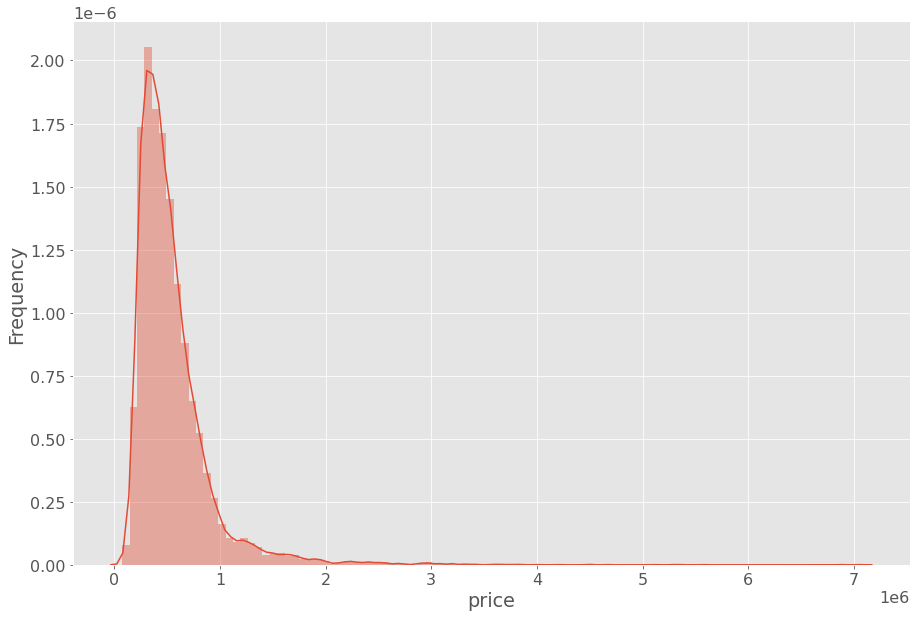

In [28]:
#物件価格のヒストグラム
sns.distplot(df['price'], bins=100)
plt.ylabel('Frequency')

約40万ドルの物件が最も多く、ロングテールを持つ分布になっていることがわかります。**

In [29]:
#物件価格ヒストグラムの尖度と歪度
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 3.971466
Kurtosis: 31.568677


物件価格のヒストグラムは尖度と歪度が大きく、対数正規分布であることがわかります。  
このままでは取り扱いにくいため、正規分布に近づける必要があります。  
そのため、物件価格に対数変換を施します。


Text(0, 0.5, 'Frequency')

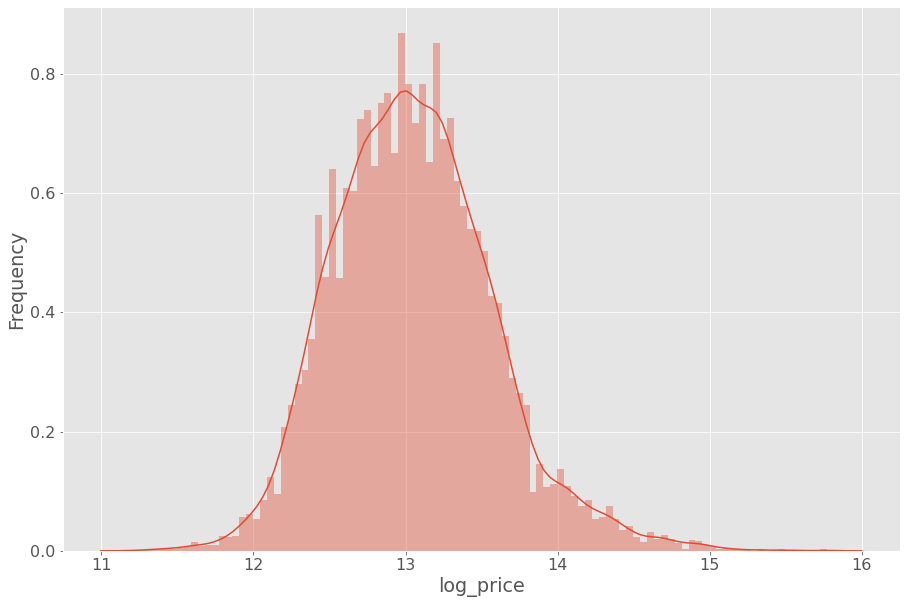

In [30]:
#物件価格のヒストグラムー対数変換後
df['log_price'] = np.log(df['price'])
sns.distplot(df['log_price'], bins=100);
plt.ylabel('Frequency')

In [31]:
#尖度と歪度
print("Skewness: %f" % np.log(df['price']).skew())
print("Kurtosis: %f" % np.log(df['price']).kurt())

Skewness: 0.471374
Kurtosis: 0.741287


ヒストグラムは正規分布に近づき、歪度と尖度が小さくなりました。  
こちらの対数変換後の物件価格を目的変数とすることで、精度の良い予測回帰モデルを作成できます。

# 2. 物件の価格と広さの分析


部屋の広さがどのように物件価格に影響を与えるのかビジュアライズしていきます。

,price,sqft_living
price,1.000000,0.700705
sqft_living,0.700705,1.000000


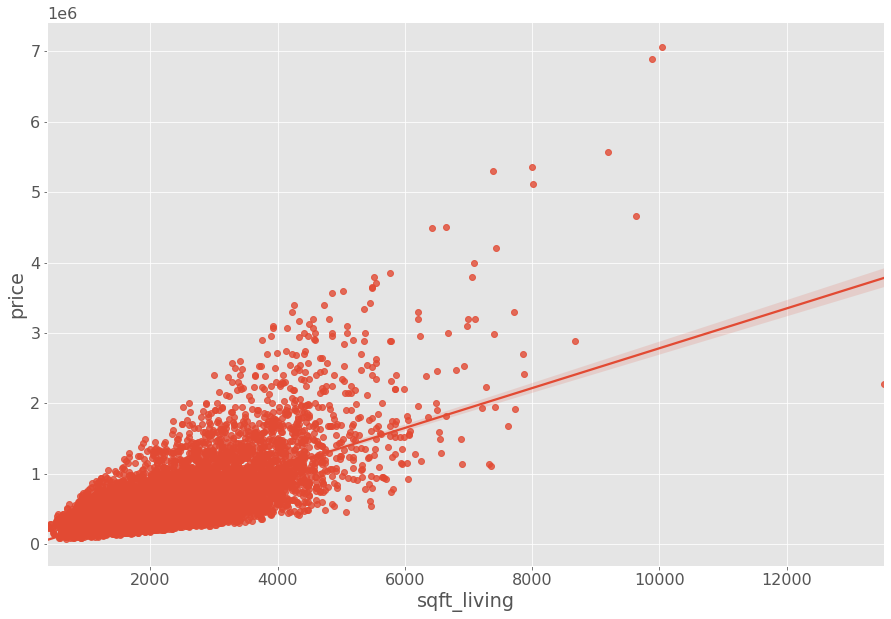

In [32]:
#散布図（価格xリビングエリアの広さ）
var = 'sqft_living'
data = pd.concat([df['price'], df[var]], axis=1)
sns.regplot(x=var, y='price', data=data) #散布図の表示
data.corr() #相関行列の表示

家の価格とリビングエリアの広さには<b>線形関係</b>がありそうです  
相関係数が <b>0.7</b>であることから，<b>強い相関</b>を持つことも分かります

,price,sqft_basement
price,1.000000,0.323724
sqft_basement,0.323724,1.000000


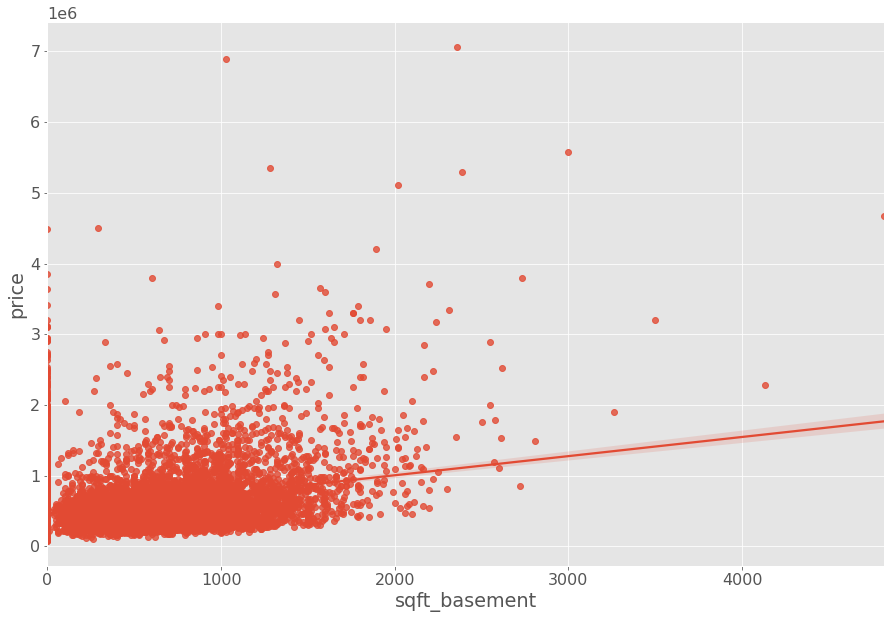

In [33]:
#散布図（価格x地下階の広さ）
var = 'sqft_basement'
data = pd.concat([df['price'], df[var]], axis=1)
sns.regplot(x=var, y='price', data=data)
data.corr()

sqft_basementが０である物件、つまり地下室を持たない物件を含んでいることがわかる。
地下室の広さは物件価格と弱い相関がある。

# 3. 物件の価格とグレード、コンディションの分析


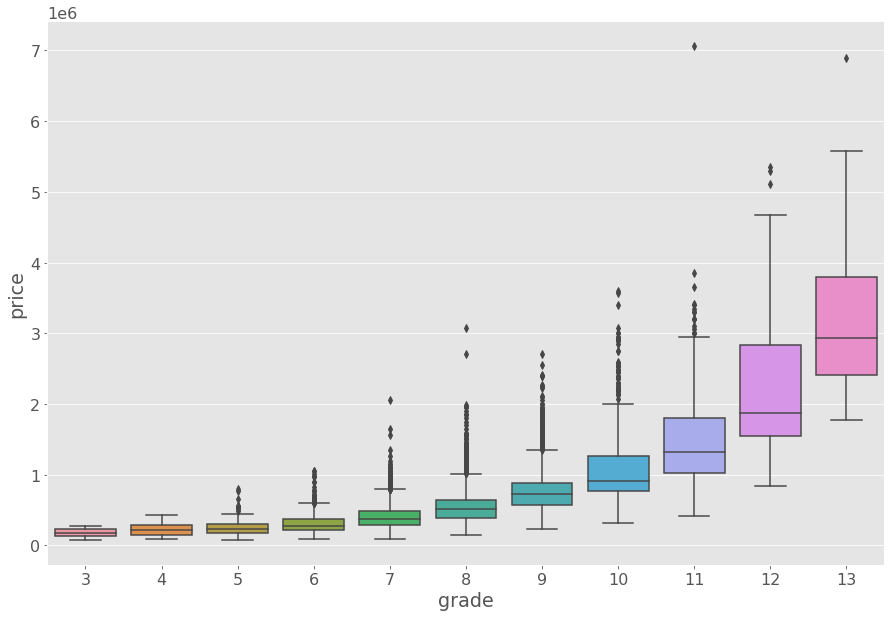

In [34]:
#ボックスプロット（価格x品質）
var = 'grade'
sns.boxplot(x=var, y="price", data=df)

グレード（品質）が高いと価格も高いことがわかります．  
いくつか外れ値があるのは，グレード以外にも価格を説明する変数があることを示唆しています


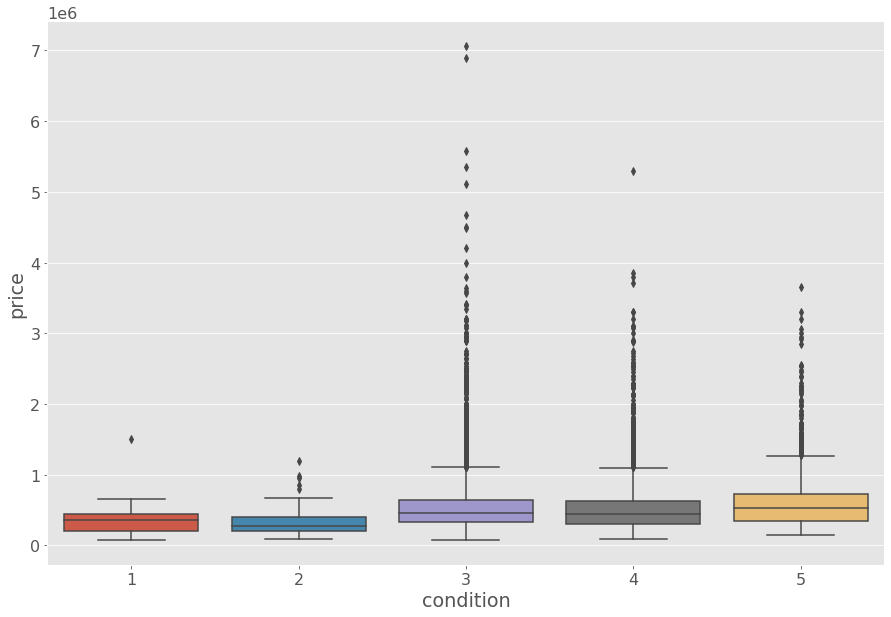

In [35]:
#ボックスプロット（価格xコンディション）
var = 'condition'
sns.boxplot(x=var, y="price", data=df)

平均値はconditionに関わらずあまり変わらないことや、外れ値が多くconditionだけでは、価格の説明は難しいことが考えられます。

# 4. 物件の価格と建築年の分析
建築年ごとに物件の平均価格と標準偏差を表示しています．

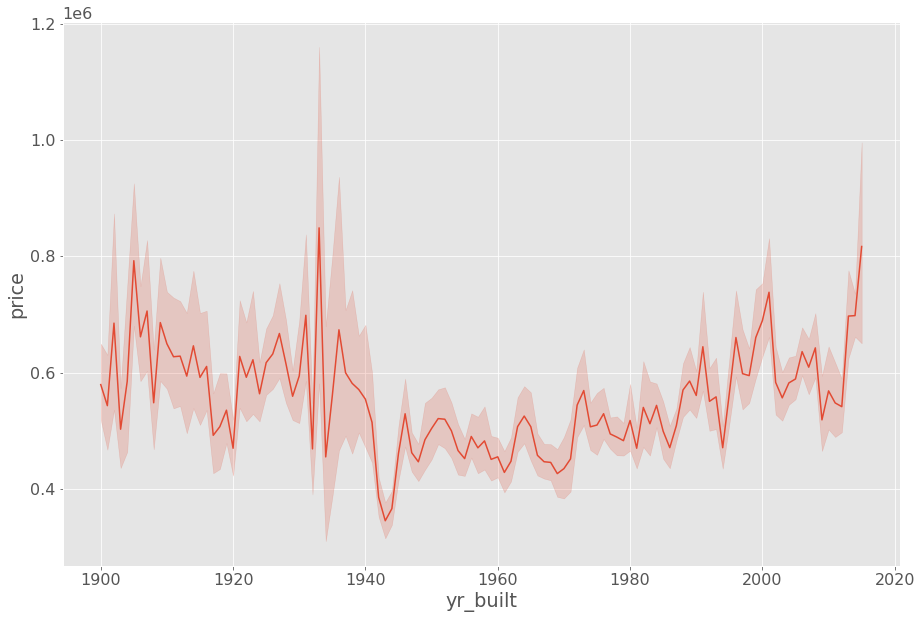

In [36]:
#ラインプロット（価格x建築年）
sns.lineplot(x="yr_built", y="price", data=df)

Text(0, 0.5, 'recorded number of built')

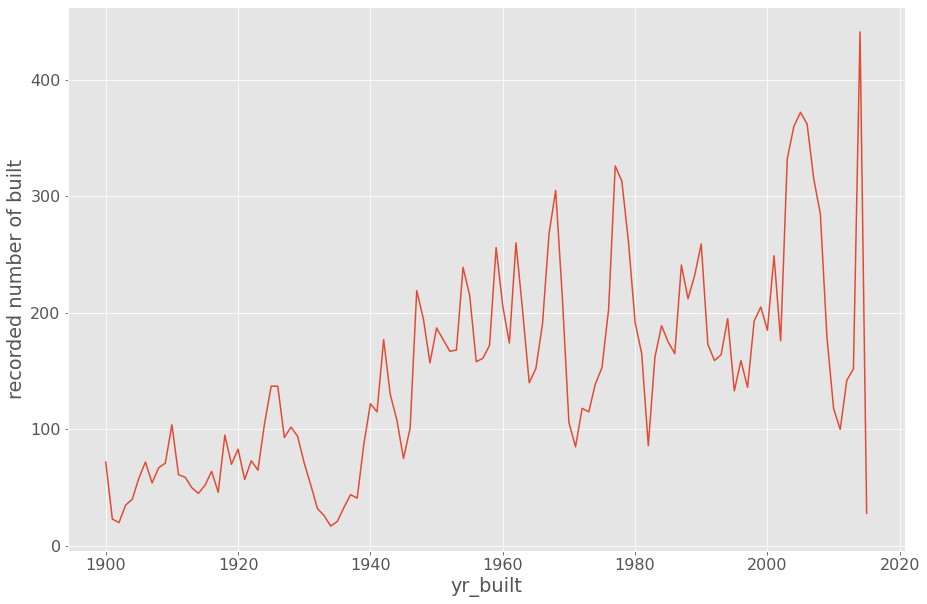

In [37]:
#建築年ごとのデータ件数
df.groupby('yr_built').price.count().plot()
plt.ylabel('recorded number of built')

建築年が1940年よりも古い物件の数が少なく、物件価格の標準偏差が大きくなっています。  
また、価値の高い物件であることから、古い物件であっても現在も立地されているのではないかといったことが考察できます。

# 5. 物件の価格と立地の分析
立地によって物件の価格に違いがあるか分析します．  

In [38]:
#folium libraryのインストール（地図描画をするライブラリです）
#少し時間がかかります
!pip install folium

In [0]:
#地図の読み込み
import folium
m = folium.Map(location=[df['lat'].median(), df['long'].median()], zoom_start=12)

In [0]:
#対数変換後の物件価格を四つの価格帯に分けて色分けします
#'skyblue', 'plum', 'tomato', 'gold'の色の順番で物件価格が高くなっていきます
df['marker_color'] = pd.cut(df['log_price'], bins=4, labels=['skyblue', 'plum', 'tomato', 'gold'])

In [0]:
#地図上に物件のマーカーを描画
for index, row in df.iterrows():
  folium.CircleMarker([row['lat'], row['long']], radius=1, color=row['marker_color']).add_to(m)

In [42]:
#地図の表示
m

Output hidden; open in https://colab.research.google.com to view.

南北で物件の価格が変わることが言えます。また、北部の中でもClyde Hill, Washington Parkの地価が比較的高いことが分かります。

## 演習課題
どんな条件が物件価格に影響を与えそうか仮説を立て，分析を行なってください.  
- 分析結果のスクリーンショットを提出

仮説をここに入力してください
テスト

結果から得られた考察をここに入力してください